In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("UpdatedResumeDataset.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df["Category"].nunique()

25

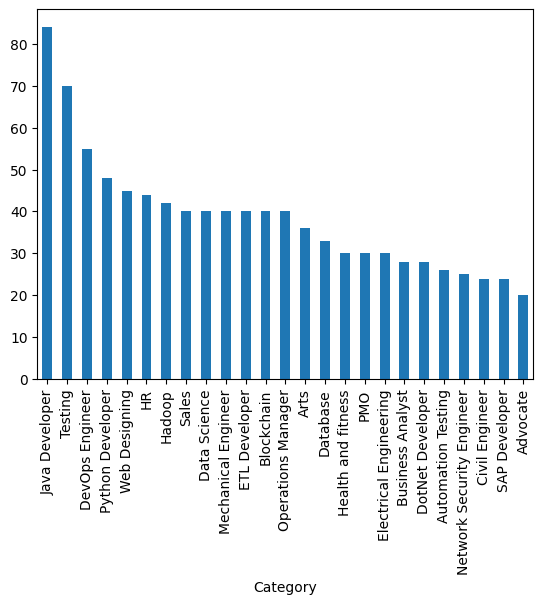

In [5]:
df["Category"].value_counts().plot(kind="bar")
plt.show()

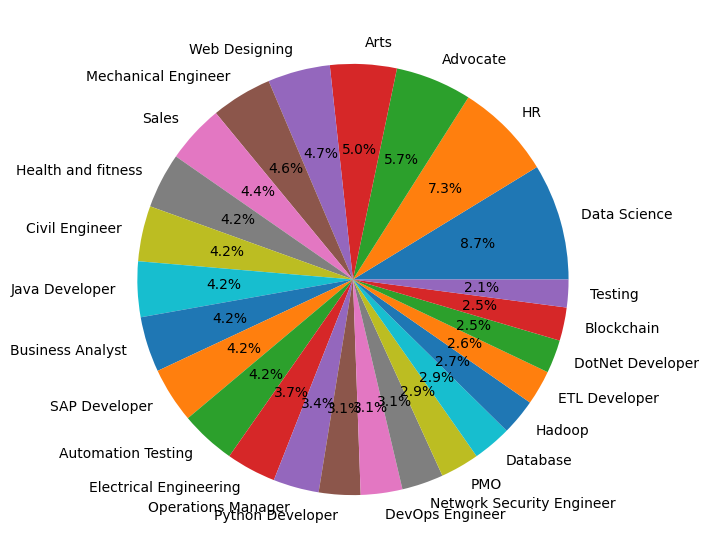

In [6]:
counts=df["Category"].value_counts()
labels=df["Category"].unique()
plt.figure(figsize=(7,7))
plt.pie(counts,labels=labels,autopct="%1.1f%%")
plt.show()

In [7]:
df["Category"][0]

'Data Science'

In [8]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [9]:
import re
import string
def clean(text):
    text=re.sub("https\S+\s","",text)
    text=re.sub("@\S","",text)
    text=re.sub("#\S+\s","",text)
    text=re.sub("RT|cc","",text)
    text=re.sub('[%s]'%re.escape(string.punctuation),"",text)
    text=re.sub('[^\x100-\x7f]'," ",text)
    text=re.sub('\s+'," ",text)

    return text
    

In [10]:
resume="this is viswanath https://viswa.com.com @gmail.com"
print(clean(df["Resume"][0])) 


Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in aelerating the review 

In [11]:
df["Resume"]=df["Resume"].apply(lambda x:clean(x))

In [12]:
df["Resume"][1]

'Education Details May 2013 to May 2017 BE UITRGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60A Koramangala 5th block AchievementsTasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedincominadityarathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holtwinter and Prophet Worked on metafeature extracting problem githubcomrathorolog

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
le.fit(df["Category"])
df["enCategory"]=le.transform(df["Category"])

In [15]:
df["enCategory"].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [16]:
df["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')

In [18]:
tfidf=tfidf.fit(df['Resume'])
req_text=tfidf.transform(df["Resume"])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(req_text,df["enCategory"],test_size=.2,random_state=42)

In [20]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((769, 7901), (769,), (193, 7901), (193,))

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)


OneVsRestClassifier(estimator=KNeighborsClassifier())

In [22]:
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9844559585492227


In [23]:
print(y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [24]:
my_resume=df["Resume"][1]
my_resume

'Education Details May 2013 to May 2017 BE UITRGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60A Koramangala 5th block AchievementsTasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedincominadityarathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holtwinter and Prophet Worked on metafeature extracting problem githubcomrathorolog

In [25]:
import pickle
pickle.dump(tfidf,open("tfidf.pkl","wb"))
pickle.dump(clf,open("clf.pkl","wb"))

In [26]:
clf = pickle.load(open("clf.pkl", "rb"))
clean_resume = clean(my_resume)
input_resume = tfidf.transform([clean_resume])   # This is already 2D
pred_id = clf.predict(input_resume)
print(pred_id)


[6]


In [27]:
dictionary=dict(zip(df["enCategory"].unique(),df["Category"].unique()))

In [28]:
dictionary[pred_id[0]]

'Data Science'